In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
import os
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data\gender_submission.csv
Data\test.csv
Data\train.csv


## Loading the data

In [68]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [93]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Surname         object
Title           object
Maiden_name     object
Other_names     object
dtype: object

In [74]:
df = train_data.copy()
df.loc[:,'Is_alone'] = np.where((df['SibSp'] == 0) & (df['Parch'] == 0), 1, 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
data_alive = train_data[train_data['Survived'] == 1]
data_dead = train_data[train_data['Survived'] == 0]
data_alive.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [7]:
data_dead.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


### Number of NaN values across the dataframe

In [8]:
print(train_data.isnull().sum(axis = 0))
print(test_data.isnull().sum(axis = 0))
print(test_data[test_data.Fare.isnull()])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


Total value space across dataframe

In [9]:
for column in train_data.columns[1:]:
    print(column, 'column')
    print("Potential values:", train_data[column].unique())
    print("Number of missing values:", train_data[column].isna().sum())

Survived column
Potential values: [0 1]
Number of missing values: 0
Pclass column
Potential values: [3 1 2]
Number of missing values: 0
Name column
Potential values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Dani

### Pattern exploration - by gender

Check the unique values within the 'Sex' column, and check if there are any missing values

In [10]:
print(train_data.columns)
print('\'Sex\' column')
print("Potential values:", train_data.Sex.unique())
print("Number of missing values:", train_data.Sex.isna().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
'Sex' column
Potential values: ['male' 'female']
Number of missing values: 0


In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("{0:.1f}% of women survived".format(rate_women*100))

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("{0:.1f}% of men survived".format(rate_men*100))

74.2% of women survived
18.9% of men survived


### Tackling the ticket formatting

Any column with no missing values may have some intrinsic value for the predictive accuracy. Ticket number could correlate with cabin position, for example, which may influence the ability to get off the ship and survive.

The ticket column has no missing values, but the formatting is inconsistent. Ideally I would split the column into the ticket number as well as any text.

re.findall allows me to extract numbers within the string.

After that I'll need to process the string contents, which are varied in formatting (with full stops, slashes and spaces used inconsistently).

Some tinkering reveals that I'll need to mask to avoid a repeating '2. ####' format, so I'll search for integer number (not floating point) with at least two digits.

In [62]:
import re
import seaborn as sns
import string
train_data = pd.read_csv('Data/train.csv')
Tickets = train_data.Ticket.str.split(r"(?=(?:\D*\d))([a-zA-Z0-9]*$)", expand = True)
Tickets[0] = Tickets[0].str.translate(str.maketrans('', '', string.punctuation))
Tickets[0] = Tickets[0].str.upper()
Tickets[0] = Tickets[0].str.replace(" ", "")
Tickets[0] = Tickets[0].str.replace("STONO2", "SOTONO2")
Tickets[0] = Tickets[0].str.replace(r"\bAS\b", "A5")
# Tickets[0] = Tickets[0].str.replace("SOP", "SOPP")
# Tickets[0] = Tickets[0].str.replace("SOPPP", "SOPP")
Tickets[0] = Tickets[0].str.replace(r"\bA4\b", "SCA4")
Tickets.rename(columns={0:'Ticket_str', 1:'Ticket_num'}, inplace = True)
Tickets['Ticket_str'].unique()
# ticket_data = train_data['ticket_number'].fillna(0).astype(int)
# train_data['Ticket'] = ticket_data
# #df["A"].str.extract("(\d*\.?\d+)", expand=True)
# sns.distplot(train_data['Ticket'])

# test_data['ticket_number'] = test_data.Ticket.str.extract(r"(?=(?:\D*\d))([a-zA-Z0-9]*$)", expand = True)
# ticket_data = pd.to_numeric(test_data['ticket_number'])
# ticket_data = pd.Series(test_data['ticket_number'])
# test_data['Ticket'] = ticket_data

array(['A5', 'PC', 'SOTONO2', '', 'PP', 'CA', 'SCPARIS', 'SCA4', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'SCAHBASLE', 'SOPP', 'FC',
       'CASOTON'], dtype=object)

Advice for generating models using nominal variables:

>"One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values)."

With that, it's likely most useful to attempt to group or bin the 'Ticket_str' potential values together. This will take some investigation into which passengers each group contains.

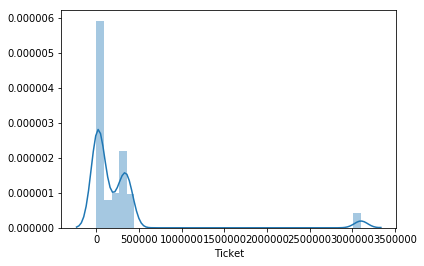

In [13]:
test_data = pd.read_csv('Data/test.csv')
test_data['ticket_number'] = test_data.Ticket.str.extract(r"(?=(?:\D*\d))([a-zA-Z0-9]*$)", expand = True)
ticket_data_test = test_data['ticket_number'].fillna(0).astype(int)
test_data['Ticket'] = ticket_data_test
#df["A"].str.extract("(\d*\.?\d+)", expand=True)
sns.distplot(test_data['Ticket'])

(0, 50000)

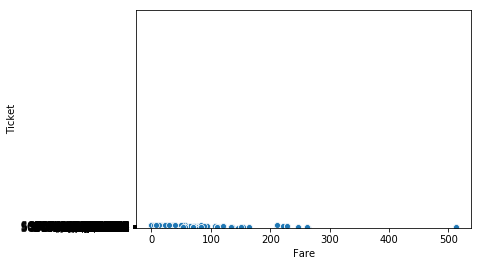

In [63]:
sns.scatterplot(data = train_data, x = 'Fare', y = 'Ticket')
plt.ylim(0, 50000)

Looking into why the Fares are not linear with Ticket number.
Possible code on the ticket number?

In [65]:
over_500 = train_data[train_data['Fare'] > 500]
print(over_500)
over_200 = train_data.Ticket[(train_data['Fare'] > 200) & (train_data['Fare'] <= 500)]
print(over_200.unique())
bet_100_200 = train_data.Ticket[(train_data['Fare'] > 100) & (train_data['Fare'] <= 200)]
print(bet_100_200.unique())
bet_50_100 = train_data.Ticket[(train_data['Fare'] > 50) & (train_data['Fare'] <= 100)]
print(bet_50_100.unique())
bel_50 = train_data.Ticket[(train_data['Fare'] <= 30)]
print(bel_50.unique())

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
['19950' 'PC 17558' 'PC 17608' '113503' 'PC 17757' 'PC 17483' '24160']
['PC 17569' '35273' 'PC 17582' 'PC 17760' '113781' '17421' 'PC 17758'
 '36928' '16966' 'PC 17611' '113760' 'PC 17761']
['PC 17599' '113803' '17463' 'PC 17604' '113789' 'PC 17572' '113509'
 '113572' '36973' 'S.O.C. 14879' '1601' 'W.E.P. 5734' 'PC 17759' '35281'
 '110465' 'PC 17593' '113776' 'PC 17597' 'CA. 2343' '113505' '11813

Note:

Including ticket did not improve the model accuracy vs. ["Pclass", "Sex", "SibSp", "Parch"] alone.

How about surname?

## Cabin data
- very partial, and includes some with multiple values 
    - looking into this, the multiple values are shared between family members. Likely indicates a single ticket being bought for multiple rooms to share.
- unsure how to proceed. Maybe make a second column for extra values?

## Fares
- Could this be a big determinant in deciding if you survive?


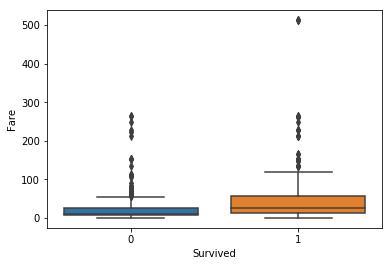

In [16]:
#from statannot import add_stat_annotation

sns.boxplot(data = train_data, x = 'Survived', y = 'Fare')
# add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
#                     box_pairs=[(0,1)])

## Names!
 - Surnames, titles, and maiden names
 - All useful information in determining passenger relationships (are fathers less likely than sons to survive?)
 - Can also be used to identify younger males (Master) and marital status of women (maiden name presence, and Ms/Miss/Mrs)

In [91]:
import re
import numpy as np 
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 

def get_first_name(obj):
    Result = re.search(r"(?<=\. ).+?(?= )", train_data['Name'][1])[0]
    if Result:
        print(Result)
        
get_first_name(train_data['Name'][0])

IndexError: no such group

In [89]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

def Split_names(df):
    Surnames = df.Name.str.split(pat = ", ", expand = True)
    Surnames.rename(columns={0:'Surname', 1:'Other_names'}, inplace=True)
    Title = Surnames.Other_names.str.split(pat = '\. ', expand = True)
    Title.rename(columns={0:'Title', 1:'Other_names'}, inplace = True)
    Maiden_name = Surnames.Other_names.str.extract('.*\((.*)\).*')
    Maiden_name.rename(columns={0:'Maiden_name'}, inplace = True)
    Other_names = Title.Other_names.str.split('\(', expand = True)
    Other_names.rename(columns={0:'Other_names', 1:'Maiden'}, inplace = True)
    
    df = df.join(Surnames['Surname'])
    df = df.join(Title['Title'])
    df = df.join(Maiden_name)
    df = df.join(Other_names['Other_names'])
    
    return df

train_data = Split_names(train_data)
test_data = Split_names(test_data)
print(train_data.columns)
print(test_data.columns)
print(train_data.Title.unique())
print(test_data.Title.unique())
print(train_data.Other_names.unique())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname', 'Title',
       'Maiden_name', 'Other_names'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname', 'Title',
       'Maiden_name', 'Other_names'],
      dtype='object')
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
['Owen Harris' 'John Bradley ' 'Laina' 'Jacques Heath ' 'William Henry'
 'James' 'Timothy J' 'Gosta Leonard' 'Oscar W ' 'Nicholas '
 'Marguerite Rut' 'Elizabeth' 'Anders Johan' 'Hulda Amanda Adolfina' ''
 'Eugene' 'Charles Eugene' 'Julius ' 'Fatima' 'Joseph J' 'Lawrence'
 'Anna "Annie"' 'William Thompson' 'Torborg Danira' 'Carl Oscar '
 'Farred Chehab' 'Charles Alexander' 'Ellen "Nellie"' 'Lalio' 'Manuel E

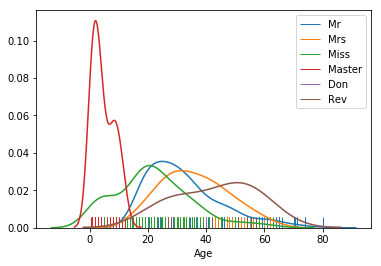

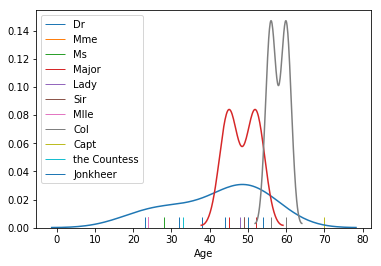

In [56]:
train_age = train_data.dropna(subset = ['Age'])
unique_vals = train_age['Title'].unique()  # [0, 1, 2]
unique_vals_1 = unique_vals[0:6]
unique_vals_2 = unique_vals[6:18]
# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets_1 = [train_age.loc[train_age['Title'] == val] for val in unique_vals_1]
targets_2 = [train_age.loc[train_age['Title'] == val] for val in unique_vals_2]
# Iterate through list and plot the sliced dataframe
for target in targets_1:
    sns.distplot(target['Age'], hist=False, rug=True)
plt.legend(unique_vals_1)
plt.show()
for target in targets_2:
    sns.distplot(target['Age'], hist=False, rug=True)
plt.legend(unique_vals_2)
plt.show()

C:\Users\tomwe\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\tomwe\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\tomwe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tomwe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


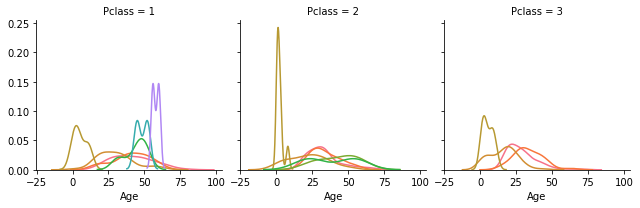

In [58]:
g = sns.FacetGrid(train_age, 
                  col='Pclass', 
                  hue = 'Title', 
                  height=3)
g.map(sns.kdeplot, "Age")

In [18]:
grouped = train_data.groupby('Surname')

for name, group in grouped:
   print(name)
   print(group)

Abbing
     PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
845          846         0       3  Abbing, Mr. Anthony  male  42.0      0   

     Parch     Ticket  Fare Cabin Embarked Surname Title Maiden_name  \
845      0  C.A. 5547  7.55   NaN        S  Abbing    Mr         NaN   

    Other_names  
845     Anthony  
Abbott
     PassengerId  Survived  Pclass                              Name     Sex  \
279          280         1       3  Abbott, Mrs. Stanton (Rosa Hunt)  female   
746          747         0       3       Abbott, Mr. Rossmore Edward    male   

      Age  SibSp  Parch     Ticket   Fare Cabin Embarked Surname Title  \
279  35.0      1      1  C.A. 2673  20.25   NaN        S  Abbott   Mrs   
746  16.0      1      1  C.A. 2673  20.25   NaN        S  Abbott    Mr   

    Maiden_name      Other_names  
279   Rosa Hunt         Stanton   
746         NaN  Rossmore Edward  
Abelson
     PassengerId  Survived  Pclass                                   Na

Attalah
     PassengerId  Survived  Pclass                   Name     Sex   Age  \
114          115         0       3  Attalah, Miss. Malake  female  17.0   
244          245         0       3   Attalah, Mr. Sleiman    male  30.0   

     SibSp  Parch Ticket     Fare Cabin Embarked  Surname Title Maiden_name  \
114      0      0   2627  14.4583   NaN        C  Attalah  Miss         NaN   
244      0      0   2694   7.2250   NaN        C  Attalah    Mr         NaN   

    Other_names  
114      Malake  
244     Sleiman  
Aubart
     PassengerId  Survived  Pclass                           Name     Sex  \
369          370         1       1  Aubart, Mme. Leontine Pauline  female   

      Age  SibSp  Parch    Ticket  Fare Cabin Embarked Surname Title  \
369  24.0      0      0  PC 17477  69.3   B35        C  Aubart   Mme   

    Maiden_name       Other_names  
369         NaN  Leontine Pauline  
Augustsson
     PassengerId  Survived  Pclass                    Name   Sex   Age  SibSp  \
833

733  William John  
Betros
     PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
378          379         0       3  Betros, Mr. Tannous  male  20.0      0   

     Parch Ticket    Fare Cabin Embarked Surname Title Maiden_name Other_names  
378      0   2648  4.0125   NaN        C  Betros    Mr         NaN     Tannous  
Bidois
     PassengerId  Survived  Pclass                   Name     Sex   Age  \
380          381         1       1  Bidois, Miss. Rosalie  female  42.0   

     SibSp  Parch    Ticket     Fare Cabin Embarked Surname Title Maiden_name  \
380      0      0  PC 17757  227.525   NaN        C  Bidois  Miss         NaN   

    Other_names  
380     Rosalie  
Bing
    PassengerId  Survived  Pclass           Name   Sex   Age  SibSp  Parch  \
74           75         1       3  Bing, Mr. Lee  male  32.0      0      0   

   Ticket     Fare Cabin Embarked Surname Title Maiden_name Other_names  
74   1601  56.4958   NaN        S    Bing    Mr         NaN  

707         NaN  Edward Pennington  
Caldwell
     PassengerId  Survived  Pclass  \
78            79         1       2   
323          324         1       2   

                                                  Name     Sex    Age  SibSp  \
78                       Caldwell, Master. Alden Gates    male   0.83      0   
323  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...  female  22.00      1   

     Parch  Ticket  Fare Cabin Embarked   Surname   Title  \
78       2  248738  29.0   NaN        S  Caldwell  Master   
323      1  248738  29.0   NaN        S  Caldwell     Mrs   

             Maiden_name      Other_names  
78                   NaN      Alden Gates  
323  Sylvia Mae Harbaugh  Albert Francis   
Calic
     PassengerId  Survived  Pclass              Name   Sex   Age  SibSp  \
163          164         0       3   Calic, Mr. Jovo  male  17.0      0   
500          501         0       3  Calic, Mr. Petar  male  17.0      0   

     Parch  Ticket    Fare Cabin Embarked Surname 

     PassengerId  Survived  Pclass  \
237          238         1       2   
637          638         0       2   
801          802         1       2   

                                            Name     Sex   Age  SibSp  Parch  \
237             Collyer, Miss. Marjorie "Lottie"  female   8.0      0      2   
637                          Collyer, Mr. Harvey    male  31.0      1      1   
801  Collyer, Mrs. Harvey (Charlotte Annie Tate)  female  31.0      1      1   

         Ticket   Fare Cabin Embarked  Surname Title           Maiden_name  \
237  C.A. 31921  26.25   NaN        S  Collyer  Miss                   NaN   
637  C.A. 31921  26.25   NaN        S  Collyer    Mr                   NaN   
801  C.A. 31921  26.25   NaN        S  Collyer   Mrs  Charlotte Annie Tate   

           Other_names  
237  Marjorie "Lottie"  
637             Harvey  
801            Harvey   
Compton
     PassengerId  Survived  Pclass                         Name     Sex   Age  \
835          836        

635      0  237668  13.0   NaN        S   Davis  Miss         NaN        Mary  
Davison
     PassengerId  Survived  Pclass                                       Name  \
347          348         1       3  Davison, Mrs. Thomas Henry (Mary E Finck)   

        Sex  Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Surname Title  \
347  female  NaN      1      0  386525  16.1   NaN        S  Davison   Mrs   

      Maiden_name    Other_names  
347  Mary E Finck  Thomas Henry   
Dean
     PassengerId  Survived  Pclass                        Name   Sex   Age  \
93            94         0       3     Dean, Mr. Bertram Frank  male  26.0   
788          789         1       3  Dean, Master. Bertram Vere  male   1.0   

     SibSp  Parch     Ticket    Fare Cabin Embarked Surname   Title  \
93       1      2  C.A. 2315  20.575   NaN        S    Dean      Mr   
788      1      2  C.A. 2315  20.575   NaN        S    Dean  Master   

    Maiden_name    Other_names  
93          NaN  Bertram Frank  
78

773      0   2674  7.2250   NaN        C   Elias    Mr         NaN        Dibo  
Elsbury
     PassengerId  Survived  Pclass                        Name   Sex   Age  \
592          593         0       3  Elsbury, Mr. William James  male  47.0   

     SibSp  Parch    Ticket  Fare Cabin Embarked  Surname Title Maiden_name  \
592      0      0  A/5 3902  7.25   NaN        S  Elsbury    Mr         NaN   

       Other_names  
592  William James  
Emanuel
     PassengerId  Survived  Pclass                           Name     Sex  \
777          778         1       3  Emanuel, Miss. Virginia Ethel  female   

     Age  SibSp  Parch  Ticket    Fare Cabin Embarked  Surname Title  \
777  5.0      0      0  364516  12.475   NaN        S  Emanuel  Miss   

    Maiden_name     Other_names  
777         NaN  Virginia Ethel  
Emir
    PassengerId  Survived  Pclass                     Name   Sex  Age  SibSp  \
26           27         0       3  Emir, Mr. Farred Chehab  male  NaN      0   

    Parch T

Futrelle
     PassengerId  Survived  Pclass  \
3              4         1       1   
137          138         0       1   

                                             Name     Sex   Age  SibSp  Parch  \
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
137                   Futrelle, Mr. Jacques Heath    male  37.0      1      0   

     Ticket  Fare Cabin Embarked   Surname Title    Maiden_name  \
3    113803  53.1  C123        S  Futrelle   Mrs  Lily May Peel   
137  113803  53.1  C123        S  Futrelle    Mr            NaN   

        Other_names  
3    Jacques Heath   
137   Jacques Heath  
Fynney
    PassengerId  Survived  Pclass                  Name   Sex   Age  SibSp  \
20           21         0       2  Fynney, Mr. Joseph J  male  35.0      0   

    Parch  Ticket  Fare Cabin Embarked Surname Title Maiden_name Other_names  
20      0  239865  26.0   NaN        S  Fynney    Mr         NaN    Joseph J  
Gale
     PassengerId  Survived  Pclass   

     PassengerId  Survived  Pclass  \
142          143         1       3   
403          404         0       3   

                                                  Name     Sex   Age  SibSp  \
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
403                     Hakkarainen, Mr. Pekka Pietari    male  28.0      1   

     Parch            Ticket   Fare Cabin Embarked      Surname Title  \
142      0  STON/O2. 3101279  15.85   NaN        S  Hakkarainen   Mrs   
403      0  STON/O2. 3101279  15.85   NaN        S  Hakkarainen    Mr   

            Maiden_name     Other_names  
142  Elin Matilda Dolck  Pekka Pietari   
403                 NaN   Pekka Pietari  
Hale
     PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
178          179         0       2  Hale, Mr. Reginald  male  30.0      0   

     Parch  Ticket  Fare Cabin Embarked Surname Title Maiden_name Other_names  
178      0  250653  13.0   NaN        S    Hale    Mr        

     PassengerId  Survived  Pclass                                   Name  \
529          530         0       2            Hocking, Mr. Richard George   
774          775         1       2  Hocking, Mrs. Elizabeth (Eliza Needs)   

        Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  Surname Title  \
529    male  23.0      2      1  29104  11.5   NaN        S  Hocking    Mr   
774  female  54.0      1      3  29105  23.0   NaN        S  Hocking   Mrs   

     Maiden_name     Other_names  
529          NaN  Richard George  
774  Eliza Needs      Elizabeth   
Hodges
     PassengerId  Survived  Pclass                     Name   Sex   Age  \
723          724         0       2  Hodges, Mr. Henry Price  male  50.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked Surname Title Maiden_name  \
723      0      0  250643  13.0   NaN        S  Hodges    Mr         NaN   

     Other_names  
723  Henry Price  
Hogeboom
     PassengerId  Survived  Pclass                                  Na

Jussila
     PassengerId  Survived  Pclass                      Name     Sex   Age  \
113          114         0       3   Jussila, Miss. Katriina  female  20.0   
402          403         0       3  Jussila, Miss. Mari Aina  female  21.0   
579          580         1       3       Jussila, Mr. Eiriik    male  32.0   

     SibSp  Parch             Ticket   Fare Cabin Embarked  Surname Title  \
113      1      0               4136  9.825   NaN        S  Jussila  Miss   
402      1      0               4137  9.825   NaN        S  Jussila  Miss   
579      0      0  STON/O 2. 3101286  7.925   NaN        S  Jussila    Mr   

    Maiden_name Other_names  
113         NaN    Katriina  
402         NaN   Mari Aina  
579         NaN      Eiriik  
Kallio
     PassengerId  Survived  Pclass                        Name   Sex   Age  \
433          434         0       3  Kallio, Mr. Nikolai Erland  male  17.0   

     SibSp  Parch             Ticket   Fare Cabin Embarked Surname Title  \
433      0

826   1601  56.4958   NaN        S     Lam    Mr         NaN         Len  
Landergren
     PassengerId  Survived  Pclass                             Name     Sex  \
376          377         1       3  Landergren, Miss. Aurora Adelia  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked     Surname Title  \
376  22.0      0      0  C 7077  7.25   NaN        S  Landergren  Miss   

    Maiden_name    Other_names  
376         NaN  Aurora Adelia  
Lang
     PassengerId  Survived  Pclass            Name   Sex   Age  SibSp  Parch  \
509          510         1       3  Lang, Mr. Fang  male  26.0      0      0   

    Ticket     Fare Cabin Embarked Surname Title Maiden_name Other_names  
509   1601  56.4958   NaN        S    Lang    Mr         NaN        Fang  
Laroche
     PassengerId  Survived  Pclass  \
43            44         1       2   
608          609         1       2   
685          686         0       2   

                                                  Name     Sex 

     PassengerId  Survived  Pclass                    Name   Sex   Age  SibSp  \
782          783         0       1  Long, Mr. Milton Clyde  male  29.0      0   

     Parch  Ticket  Fare Cabin Embarked Surname Title Maiden_name  \
782      0  113501  30.0    D6        S    Long    Mr         NaN   

      Other_names  
782  Milton Clyde  
Longley
     PassengerId  Survived  Pclass                           Name     Sex  \
627          628         1       1  Longley, Miss. Gretchen Fiske  female   

      Age  SibSp  Parch Ticket     Fare Cabin Embarked  Surname Title  \
627  21.0      0      0  13502  77.9583    D9        S  Longley  Miss   

    Maiden_name     Other_names  
627         NaN  Gretchen Fiske  
Louch
     PassengerId  Survived  Pclass  \
432          433         1       2   

                                                  Name     Sex   Age  SibSp  \
432  Louch, Mrs. Charles Alexander (Alice Adelaide ...  female  42.0      1   

     Parch      Ticket  Fare Cabin Emb

McNamee
     PassengerId  Survived  Pclass               Name   Sex   Age  SibSp  \
743          744         0       3  McNamee, Mr. Neal  male  24.0      1   

     Parch  Ticket  Fare Cabin Embarked  Surname Title Maiden_name Other_names  
743      0  376566  16.1   NaN        S  McNamee    Mr         NaN        Neal  
Meanwell
     PassengerId  Survived  Pclass                            Name     Sex  \
564          565         0       3  Meanwell, Miss. (Marion Ogden)  female   

     Age  SibSp  Parch             Ticket  Fare Cabin Embarked   Surname  \
564  NaN      0      0  SOTON/O.Q. 392087  8.05   NaN        S  Meanwell   

    Title   Maiden_name Other_names  
564  Miss  Marion Ogden              
Meek
     PassengerId  Survived  Pclass                                     Name  \
415          416         0       3  Meek, Mrs. Thomas (Annie Louise Rowley)   

        Sex  Age  SibSp  Parch  Ticket  Fare Cabin Embarked Surname Title  \
415  female  NaN      0      0  343095  8

     PassengerId  Survived  Pclass                            Name     Sex  \
241          242         1       3  Murphy, Miss. Katherine "Kate"  female   
612          613         1       3     Murphy, Miss. Margaret Jane  female   

     Age  SibSp  Parch  Ticket  Fare Cabin Embarked Surname Title Maiden_name  \
241  NaN      1      0  367230  15.5   NaN        Q  Murphy  Miss         NaN   
612  NaN      1      0  367230  15.5   NaN        Q  Murphy  Miss         NaN   

          Other_names  
241  Katherine "Kate"  
612     Margaret Jane  
Myhrman
     PassengerId  Survived  Pclass                                     Name  \
775          776         0       3  Myhrman, Mr. Pehr Fabian Oliver Malkolm   

      Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Surname Title  \
775  male  18.0      0      0  347078  7.75   NaN        S  Myhrman    Mr   

    Maiden_name                 Other_names  
775         NaN  Pehr Fabian Oliver Malkolm  
Naidenoff
     PassengerId  Survive

47     Bridget  
O'Dwyer
    PassengerId  Survived  Pclass                           Name     Sex  Age  \
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket    Fare Cabin Embarked  Surname Title Maiden_name  \
28      0      0  330959  7.8792   NaN        Q  O'Dwyer  Miss         NaN   

       Other_names  
28  Ellen "Nellie"  
O'Leary
     PassengerId  Survived  Pclass                           Name     Sex  \
653          654         1       3  O'Leary, Miss. Hanora "Norah"  female   

     Age  SibSp  Parch  Ticket    Fare Cabin Embarked  Surname Title  \
653  NaN      0      0  330919  7.8292   NaN        Q  O'Leary  Miss   

    Maiden_name     Other_names  
653         NaN  Hanora "Norah"  
O'Sullivan
     PassengerId  Survived  Pclass                            Name     Sex  \
502          503         0       3  O'Sullivan, Miss. Bridget Mary  female   

     Age  SibSp  Parch  Ticket    Fare Cabin Embarked     Surname Tit

259              
Partner
     PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
331          332         0       1  Partner, Mr. Austen  male  45.5      0   

     Parch  Ticket  Fare Cabin Embarked  Surname Title Maiden_name Other_names  
331      0  113043  28.5  C124        S  Partner    Mr         NaN      Austen  
Pasic
     PassengerId  Survived  Pclass              Name   Sex   Age  SibSp  \
836          837         0       3  Pasic, Mr. Jakob  male  21.0      0   

     Parch  Ticket    Fare Cabin Embarked Surname Title Maiden_name  \
836      0  315097  8.6625   NaN        S   Pasic    Mr         NaN   

    Other_names  
836       Jakob  
Patchett
     PassengerId  Survived  Pclass                  Name   Sex   Age  SibSp  \
575          576         0       3  Patchett, Mr. George  male  19.0      0   

     Parch  Ticket  Fare Cabin Embarked   Surname Title Maiden_name  \
575      0  358585  14.5   NaN        S  Patchett    Mr         NaN   

    Othe

800      Martin  
Porter
     PassengerId  Survived  Pclass                            Name   Sex  \
110          111         0       1  Porter, Mr. Walter Chamberlain  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked Surname Title  \
110  47.0      0      0  110465  52.0  C110        S  Porter    Mr   

    Maiden_name         Other_names  
110         NaN  Walter Chamberlain  
Potter
     PassengerId  Survived  Pclass  \
879          880         1       1   

                                              Name     Sex   Age  SibSp  \
879  Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   

     Parch Ticket     Fare Cabin Embarked Surname Title           Maiden_name  \
879      1  11767  83.1583   C50        C  Potter   Mrs  Lily Alexenia Wilson   

    Other_names  
879  Thomas Jr   
Quick
     PassengerId  Survived  Pclass  \
506          507         1       2   
530          531         1       2   

                                              Name

    PassengerId  Survived  Pclass                      Name   Sex  Age  SibSp  \
45           46         0       3  Rogers, Mr. William John  male  NaN      0   

    Parch           Ticket  Fare Cabin Embarked Surname Title Maiden_name  \
45      0  S.C./A.4. 23567  8.05   NaN        S  Rogers    Mr         NaN   

     Other_names  
45  William John  
Romaine
     PassengerId  Survived  Pclass  \
187          188         1       1   

                                              Name   Sex   Age  SibSp  Parch  \
187  Romaine, Mr. Charles Hallace ("Mr C Rolmane")  male  45.0      0      0   

     Ticket   Fare Cabin Embarked  Surname Title     Maiden_name  \
187  111428  26.55   NaN        S  Romaine    Mr  "Mr C Rolmane"   

          Other_names  
187  Charles Hallace   
Rommetvedt
     PassengerId  Survived  Pclass                        Name   Sex  Age  \
667          668         0       3  Rommetvedt, Mr. Knud Paust  male  NaN   

     SibSp  Parch  Ticket   Fare Cabin Embarked

    PassengerId  Survived  Pclass                            Name   Sex   Age  \
12           13         0       3  Saundercock, Mr. William Henry  male  20.0   

    SibSp  Parch     Ticket  Fare Cabin Embarked      Surname Title  \
12      0      0  A/5. 2151  8.05   NaN        S  Saundercock    Mr   

   Maiden_name    Other_names  
12         NaN  William Henry  
Sawyer
     PassengerId  Survived  Pclass                           Name   Sex   Age  \
676          677         0       3  Sawyer, Mr. Frederick Charles  male  24.5   

     SibSp  Parch  Ticket  Fare Cabin Embarked Surname Title Maiden_name  \
676      0      0  342826  8.05   NaN        S  Sawyer    Mr         NaN   

           Other_names  
676  Frederick Charles  
Scanlan
     PassengerId  Survived  Pclass                Name   Sex  Age  SibSp  \
468          469         0       3  Scanlan, Mr. James  male  NaN      0   

     Parch Ticket   Fare Cabin Embarked  Surname Title Maiden_name Other_names  
468      0  362

     PassengerId  Survived  Pclass                            Name   Sex  \
134          135         0       2  Sobey, Mr. Samuel James Hayden  male   

      Age  SibSp  Parch      Ticket  Fare Cabin Embarked Surname Title  \
134  25.0      0      0  C.A. 29178  13.0   NaN        S   Sobey    Mr   

    Maiden_name          Other_names  
134         NaN  Samuel James Hayden  
Soholt
     PassengerId  Survived  Pclass  \
715          716         0       3   

                                           Name   Sex   Age  SibSp  Parch  \
715  Soholt, Mr. Peter Andreas Lauritz Andersen  male  19.0      0      0   

     Ticket  Fare  Cabin Embarked Surname Title Maiden_name  \
715  348124  7.65  F G73        S  Soholt    Mr         NaN   

                        Other_names  
715  Peter Andreas Lauritz Andersen  
Somerton
     PassengerId  Survived  Pclass                           Name   Sex   Age  \
488          489         0       3  Somerton, Mr. Francis William  male  30.0   

     S

     PassengerId  Survived  Pclass  \
431          432         1       3   
639          640         0       3   

                                                  Name     Sex  Age  SibSp  \
431  Thorneycroft, Mrs. Percival (Florence Kate White)  female  NaN      1   
639                         Thorneycroft, Mr. Percival    male  NaN      1   

     Parch  Ticket  Fare Cabin Embarked       Surname Title  \
431      0  376564  16.1   NaN        S  Thorneycroft   Mrs   
639      0  376564  16.1   NaN        S  Thorneycroft    Mr   

             Maiden_name Other_names  
431  Florence Kate White   Percival   
639                  NaN    Percival  
Tikkanen
     PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
382          383         0       3  Tikkanen, Mr. Juho  male  32.0      0   

     Parch             Ticket   Fare Cabin Embarked   Surname Title  \
382      0  STON/O 2. 3101293  7.925   NaN        S  Tikkanen    Mr   

    Maiden_name Other_names  
382   

694  113800  26.55   NaN        S    Weir   Col         NaN        John  
Weisz
     PassengerId  Survived  Pclass  \
133          134         1       2   

                                              Name     Sex   Age  SibSp  \
133  Weisz, Mrs. Leopold (Mathilde Francoise Pede)  female  29.0      1   

     Parch  Ticket  Fare Cabin Embarked Surname Title  \
133      0  228414  26.0   NaN        S   Weisz   Mrs   

                 Maiden_name Other_names  
133  Mathilde Francoise Pede    Leopold   
Wells
     PassengerId  Survived  Pclass               Name     Sex  Age  SibSp  \
750          751         1       2  Wells, Miss. Joan  female  4.0      1   

     Parch Ticket  Fare Cabin Embarked Surname Title Maiden_name Other_names  
750      1  29103  23.0   NaN        S   Wells  Miss         NaN        Joan  
West
     PassengerId  Survived  Pclass                                     Name  \
58            59         1       2             West, Miss. Constance Mirium   
450      

203      0   2628  7.225   NaN        C  Youseff    Mr         NaN     Gerious  
Yousif
     PassengerId  Survived  Pclass               Name   Sex  Age  SibSp  \
354          355         0       3  Yousif, Mr. Wazli  male  NaN      0   

     Parch Ticket   Fare Cabin Embarked Surname Title Maiden_name Other_names  
354      0   2647  7.225   NaN        C  Yousif    Mr         NaN       Wazli  
Yousseff
     PassengerId  Survived  Pclass                   Name   Sex  Age  SibSp  \
495          496         0       3  Yousseff, Mr. Gerious  male  NaN      0   

     Parch Ticket     Fare Cabin Embarked   Surname Title Maiden_name  \
495      0   2627  14.4583   NaN        C  Yousseff    Mr         NaN   

    Other_names  
495     Gerious  
Yrois
     PassengerId  Survived  Pclass                                    Name  \
199          200         0       2  Yrois, Miss. Henriette ("Mrs Harbeck")   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Surname Title  \
199  fema

### Training a model - Random Forest to start

Checking on the defaults if the RandomForestClassifier using 'mean_absolute_error' of predicted values versus in-sample validation set.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def get_mae(n_estimators, train_X, val_X, train_y, val_y):
    get_model = RandomForestClassifier(n_estimators = n_estimators, 
                                       max_depth = max_depth, 
                                       random_state = 1)
    get_model.fit(train_X, train_y)
    preds_val = get_model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

features = ["Pclass", "Sex", "SibSp", "Parch", 'Title']
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

candidate_n_estimators = [5, 25, 50, 100, 250, 500]
candidate_max_depth = [4, 5, 6]
# Write loop to find the ideal tree size from candidate_n_estimators
for max_depth in candidate_max_depth:
    print("Max depth: {}".format(max_depth))
    for n_estimators in candidate_n_estimators:
        my_mae= get_mae(n_estimators, train_X, val_X, train_y, val_y)
        print("Max estimators: {}  \t\t Validation accuracy:  {}".format(n_estimators, 1- my_mae))


Max depth: 4
Max estimators: 5  		 Validation accuracy:  0.7982062780269058
Max estimators: 25  		 Validation accuracy:  0.8116591928251121
Max estimators: 50  		 Validation accuracy:  0.8116591928251121
Max estimators: 100  		 Validation accuracy:  0.8116591928251121
Max estimators: 250  		 Validation accuracy:  0.8116591928251121
Max estimators: 500  		 Validation accuracy:  0.8116591928251121
Max depth: 5
Max estimators: 5  		 Validation accuracy:  0.8071748878923767
Max estimators: 25  		 Validation accuracy:  0.8116591928251121
Max estimators: 50  		 Validation accuracy:  0.8071748878923767
Max estimators: 100  		 Validation accuracy:  0.8161434977578476
Max estimators: 250  		 Validation accuracy:  0.8161434977578476
Max estimators: 500  		 Validation accuracy:  0.8161434977578476
Max depth: 6
Max estimators: 5  		 Validation accuracy:  0.8161434977578476
Max estimators: 25  		 Validation accuracy:  0.8161434977578476
Max estimators: 50  		 Validation accuracy:  0.816143497757847

In [20]:
# from sklearn.preprocessing import OneHotEncoder

# # Get list of categorical variables
# s = (X_train.dtypes == 'object')
# object_cols = list(s[s].index)

# print("Categorical variables:")
# print(object_cols)

# # Apply one-hot encoder to each column with categorical data
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))
# OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# # One-hot encoding removed index; put it back
# OH_cols_train.index = X_train.index
# OH_cols_valid.index = X_valid.index

# # Remove categorical columns (will replace with one-hot encoding)
# num_X_train = X_train.drop(object_cols, axis=1)
# num_X_valid = X_valid.drop(object_cols, axis=1)

# # Add one-hot encoded columns to numerical features
# OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
# OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# print("MAE from Approach 3 (One-Hot Encoding):") 
# print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Title"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

model = RandomForestClassifier(n_estimators = 100, 
                               max_depth = 5, 
                               random_state = 1)
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)

# accu_train = np.sum(c.predict(train_X.values.reshape(-1, 1)) == train_y)/y_train.size
print('In-sample validation accuracy: {0:.3f}'.format(1 - mean_absolute_error(val_y, val_predictions)))

model.fit(X, y)
predictions = model.predict(X_test)

In-sample validation accuracy: 0.816


ValueError: Number of features of the model must match the input. Model n_features is 22 and input n_features is 14 

In [ ]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : predictions})
output.to_csv('RF_submission_2.csv', index = False)
print("Saved it!")

Having learned about pipelines:

- through the Kaggle Learn Intermediate Machine Learning course I have had a chance to understand pipelines - something that I knew I was missing out on, but didn't really understand well enough to implement.
- This course also helped with the details of dealing with categorical variables, dummy values, and generally getting more familiar with other models to use. 
    - I'll end up turning to XGBoost, as it's clearly very powerful, but I'd like to see what I can manage by fine tuning the variables in the random forest models I'm currently using

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Read the data
# X = pd.read_csv('../input/train.csv', index_col='Id')
# X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# # Remove rows with missing target, separate target from predictors
# X.dropna(axis=0, subset=['SalePrice'], inplace=True)
# y = X.SalePrice              
# X.drop(['SalePrice'], axis=1, inplace=True)

# # Break off validation set from training data
# X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
#                                                                 random_state=0)

# # "Cardinality" means the number of unique values in a column
# # Select categorical columns with relatively low cardinality (convenient but arbitrary)
# low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
#                         X_train_full[cname].dtype == "object"]

# # Select numeric columns
# numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# # Keep selected columns only
# my_cols = low_cardinality_cols + numeric_cols
# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()
# X_test = X_test_full[my_cols].copy()

# # One-hot encode the data (to shorten the code, we use pandas)
# X_train = pd.get_dummies(X_train)
# print("X_train number of columns: ", len(X_train.columns))
# X_valid = pd.get_dummies(X_valid)
# print("X_valid number of columns: ", len(X_valid.columns))
# X_test = pd.get_dummies(X_test)
# print("X_test number of columns: ", len(X_test.columns))
# X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
# print("X_train number of columns: ", len(X_train.columns))
# # print(X_train.iloc[:,-15:].sum().values)
# print("X_valid number of columns: ", len(X_valid.columns))
# # print(X_valid.iloc[:,-15:].sum().values)
# X_train, X_test = X_train.align(X_test, join='left', axis=1)
# print("X_train number of columns: ", len(X_train.columns))
# # print(X_train.iloc[:,-15:].sum().values)
# print("X_test number of columns: ", len(X_test.columns))
# # print(X_test.iloc[:,-15:].sum().values)